In [1650]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1651]:
radar = pd.read_csv('radar.csv')

In [1652]:
radar.columns = ["time","x","y","z"]
radar

,time,x,y,z
0,10.0,69.2,69.2,16900.0
1,20.0,178.0,134.0,16800.0
2,30.0,200.0,221.0,16600.0
3,40.0,278.0,221.0,16800.0
4,50.0,326.0,308.0,16700.0
...,...,...,...,...
124,1250.0,6240.0,5870.0,3620.0
125,1260.0,6300.0,5900.0,3330.0
126,1270.0,6270.0,5900.0,3360.0
127,1280.0,6290.0,5940.0,3230.0


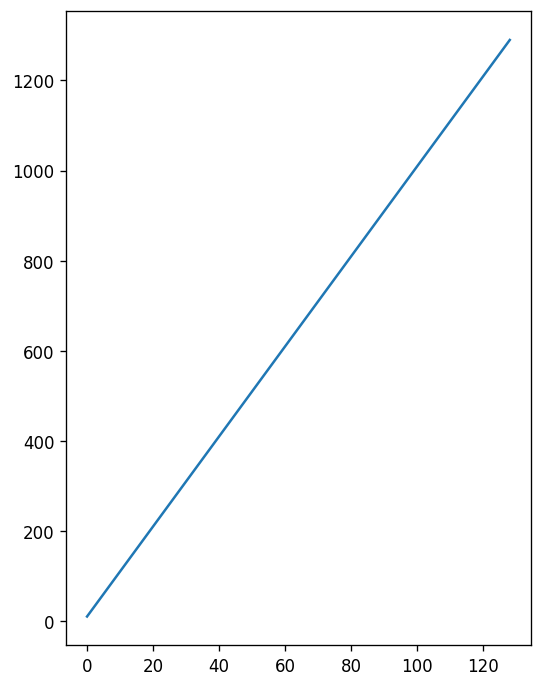

In [1653]:
plt.plot(radar.iloc[:,0])
#check that time is in regular steps

In [1654]:
coords = radar.set_index("time").iloc[:,0:]
coords

,x,y,z
time,,,
10.0,69.2,69.2,16900.0
20.0,178.0,134.0,16800.0
30.0,200.0,221.0,16600.0
40.0,278.0,221.0,16800.0
50.0,326.0,308.0,16700.0
...,...,...,...
1250.0,6240.0,5870.0,3620.0
1260.0,6300.0,5900.0,3330.0
1270.0,6270.0,5900.0,3360.0


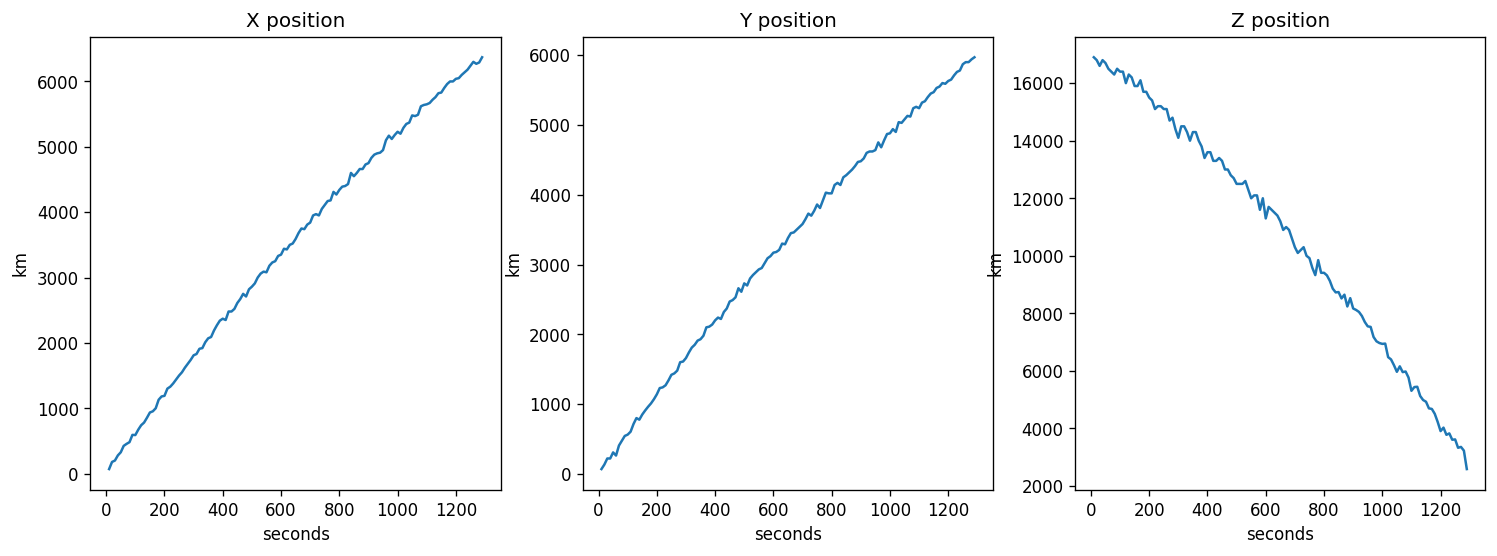

In [1655]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(coords.iloc[:,0])
axes[1].plot(coords.iloc[:,1])
axes[2].plot(coords.iloc[:,2])
axes[0].set_ylabel("km")
axes[0].set_xlabel("seconds")
axes[0].set_title("X position")
axes[1].set_ylabel("km")
axes[1].set_xlabel("seconds")
axes[1].set_title("Y position")
axes[2].set_ylabel("km")
axes[2].set_xlabel("seconds")
axes[2].set_title("Z position")
plt.savefig("pos.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


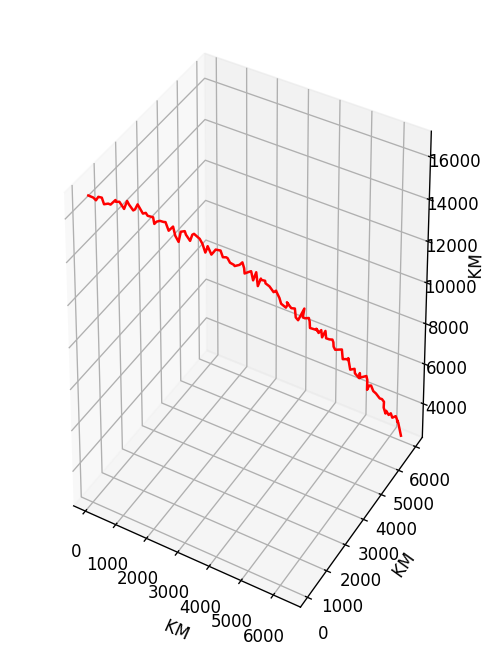

In [1656]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(coords.iloc[:,0], coords.iloc[:,1], coords.iloc[:,2], 'red')
ax.set_xlabel("     KM")
ax.set_ylabel("     KM")
ax.set_zlabel("     KM")
plt.savefig("3D-pos.eps")

In [1657]:
#we have a multivariate time series
#we can probably say that the velocity is independent of time 
#is the velocity in each direction independent? 
#if yes, then we can use autoregression on each variable independently 

In [1658]:
#first difference
vel = coords.diff()

#second difference
acc = coords.diff().diff()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


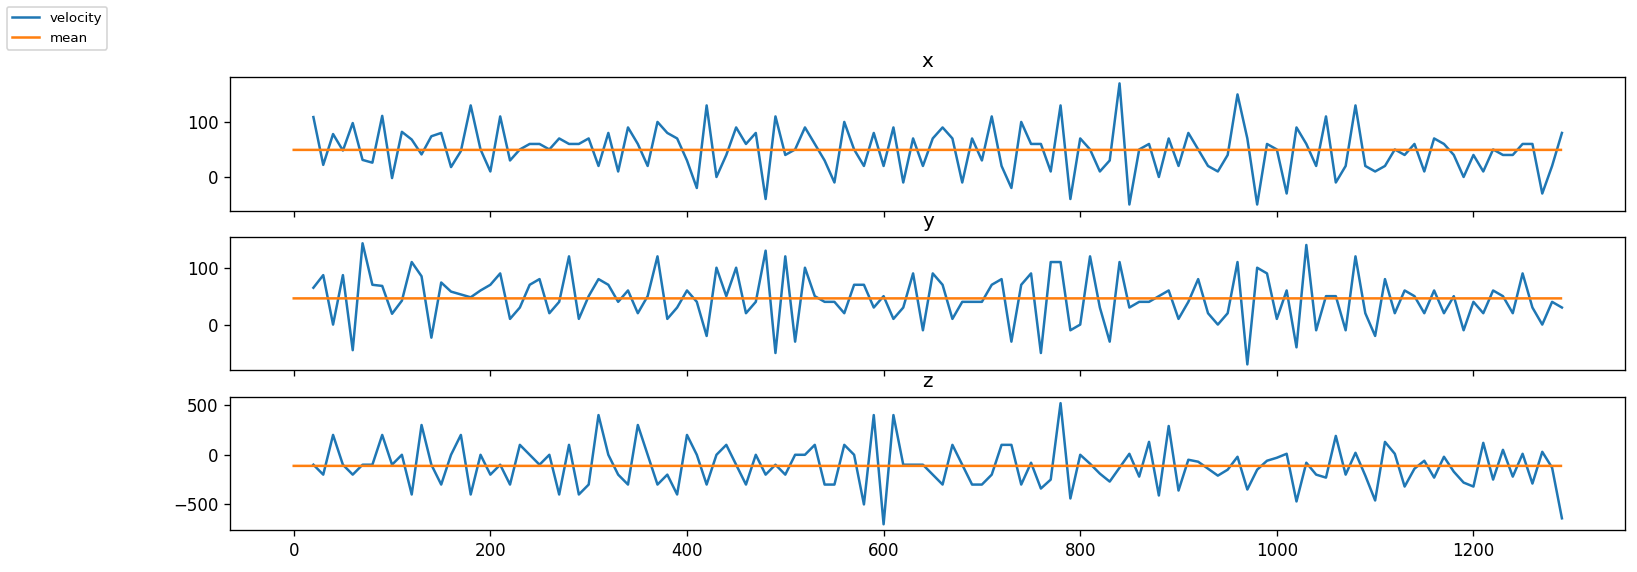

In [1659]:
fig, axes = plt.subplots(3, 1, sharex=True,figsize=(15,5))
axes[0].plot(vel.iloc[:,0],figure=fig,label="velocity")
axes[0].plot([vel.iloc[:,0].mean() for i in range(vel.iloc[:,0].size*10)],figure=fig, label = "mean")
axes[0].set_title("x")
axes[1].plot(vel.iloc[:,1],figure=fig)
axes[1].plot([vel.iloc[:,1].mean() for i in range(vel.iloc[:,1].size*10)],figure=fig)
axes[1].set_title("y")
axes[2].plot(vel.iloc[:,2],figure=fig)
axes[2].plot([vel.iloc[:,2].mean() for i in range(vel.iloc[:,2].size*10)],figure=fig)
axes[2].set_title("z")
fig.legend(loc='upper left', fontsize=8)
plt.savefig("vel.eps")

In [1660]:
#KPSS test for stationarity 
from statsmodels.tsa.stattools import kpss
#x 
statistic, p_value, n_lags, critical_values = kpss(vel.iloc[:,0].dropna())
print(statistic,critical_values)
print("p:",p_value)
print(f'Result: X velocity is {"not " if p_value < 0.05 else ""}stationary')
#y
statistic, p_value, n_lags, critical_values = kpss(vel.iloc[:,1].dropna())
print("p:",p_value)
print(f'Result: Y velocity is {"not " if p_value < 0.05 else ""}stationary')
#z
statistic, p_value, n_lags, critical_values = kpss(vel.iloc[:,2].dropna())
print("p:",p_value)
print(f'Result: Z velocity is {"not " if p_value < 0.05 else ""}stationary')

0.8688251374132911 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
p: 0.01
Result: X velocity is not stationary
p: 0.01
Result: Y velocity is not stationary
p: 0.01324610336625167
Result: Z velocity is not stationary


/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [1661]:
#x 
statistic, p_value, n_lags, critical_values = kpss(acc.iloc[:,0].dropna())
print(statistic,critical_values)
print("p:",p_value)
print(f'Result: X acceleration is {"not " if p_value < 0.05 else ""}stationary')
#y
statistic, p_value, n_lags, critical_values = kpss(acc.iloc[:,1].dropna())
print("p:",p_value)
print(f'Result: Y acceleration is {"not " if p_value < 0.05 else ""}stationary')
#z
statistic, p_value, n_lags, critical_values = kpss(acc.iloc[:,2].dropna())
print("p:",p_value)
print(f'Result: Z acceleration is {"not " if p_value < 0.05 else ""}stationary')

0.09757401658902347 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
p: 0.1
Result: X acceleration is stationary
p: 0.1
Result: Y acceleration is stationary
p: 0.1
Result: Z acceleration is stationary


/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/stattools.p

In [1662]:
#the velocity in x-y direction is not stationary compared to the z direction

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


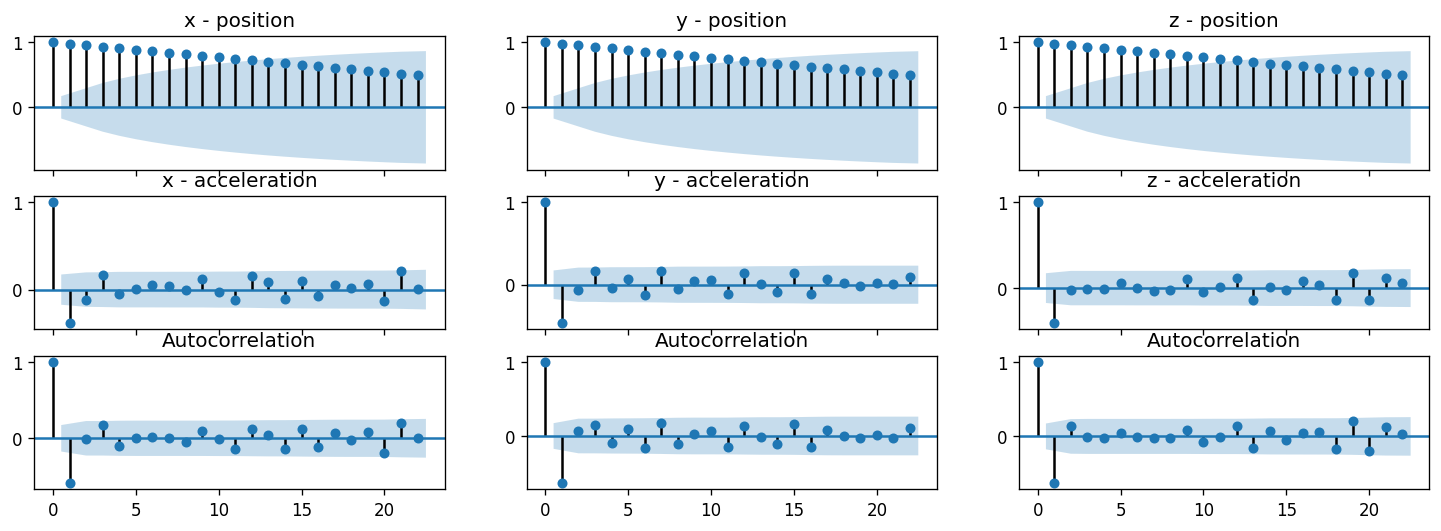

In [1663]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(5,7), 'figure.dpi':120})

# autocorrelation
fig, axes = plt.subplots(3, 3, sharex=True,figsize=(15,5))
plot_acf(coords.iloc[:,0], ax=axes[0][0])
plot_acf(coords.iloc[:,1], ax=axes[0][1])
plot_acf(coords.iloc[:,2], ax=axes[0][2])
axes[0][0].set_title("x - position")
axes[0][1].set_title("y - position")
axes[0][2].set_title("z - position")

plot_acf(vel.iloc[:,0].dropna(), ax=axes[1][0])
plot_acf(vel.iloc[:,1].dropna(), ax=axes[1][1])
plot_acf(vel.iloc[:,2].dropna(), ax=axes[1][2])

axes[1][0].set_title("x - velocity")
axes[1][1].set_title("y - velocity")
axes[1][2].set_title("z - velocity")

plot_acf(acc.iloc[:,0].dropna(), ax=axes[2][0])
plot_acf(acc.iloc[:,1].dropna(), ax=axes[2][1])
plot_acf(acc.iloc[:,2].dropna(), ax=axes[2][2])

axes[1][0].set_title("x - acceleration")
axes[1][1].set_title("y - acceleration")
axes[1][2].set_title("z - acceleration")

plt.savefig("acf.eps")
plt.show()

/home/samuel/.local/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


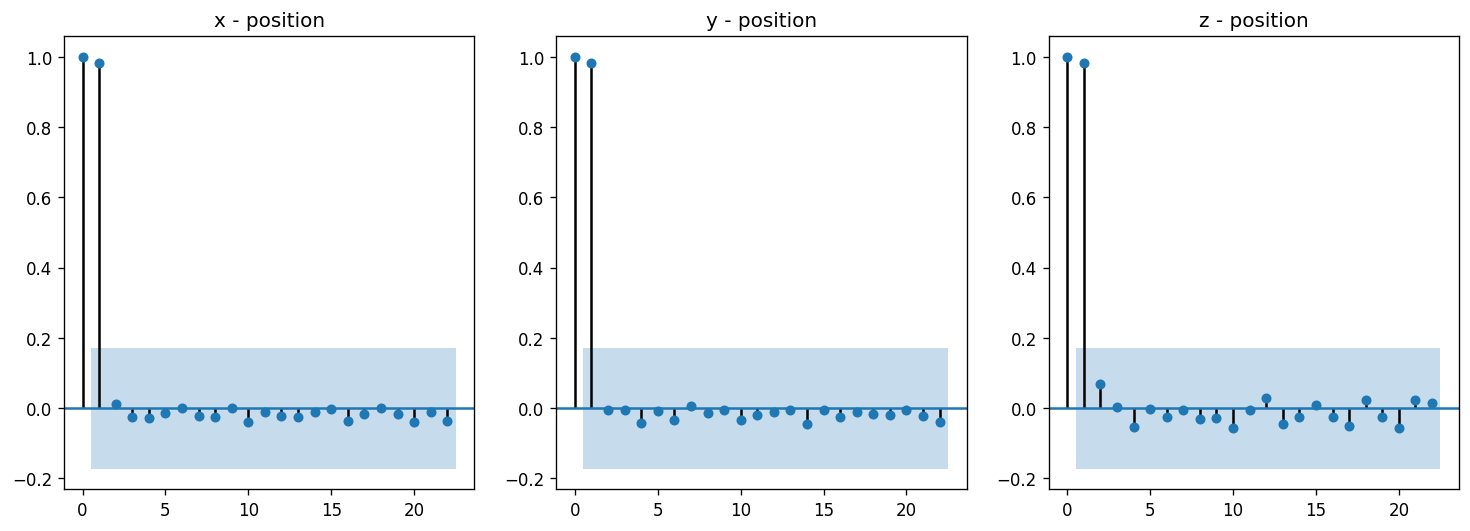

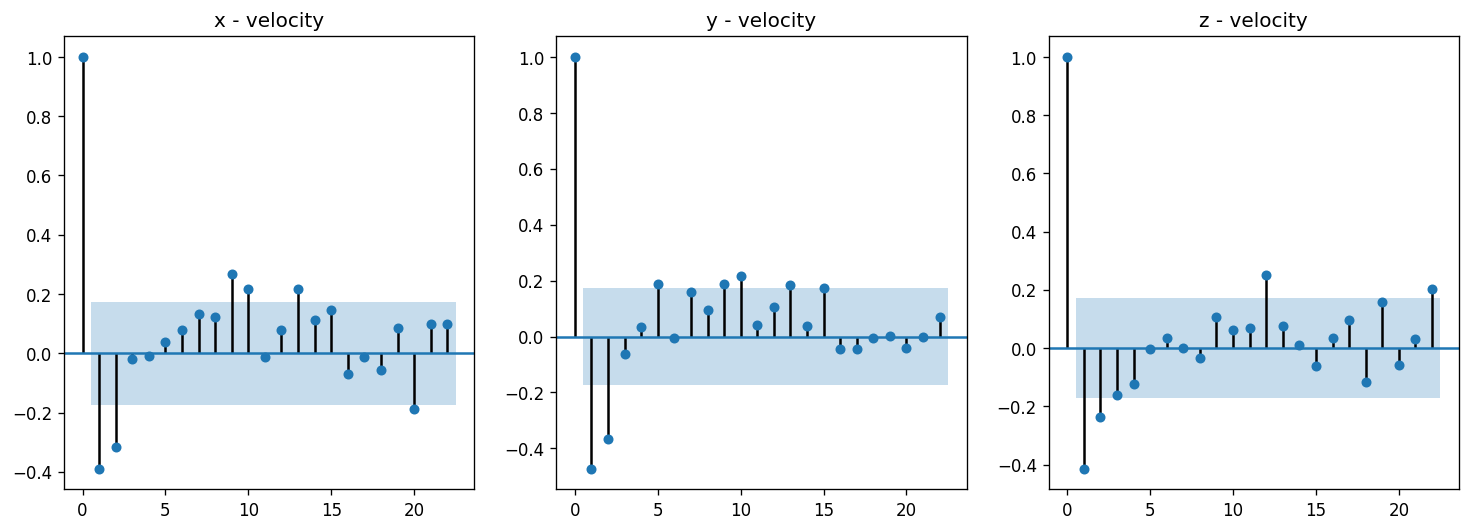

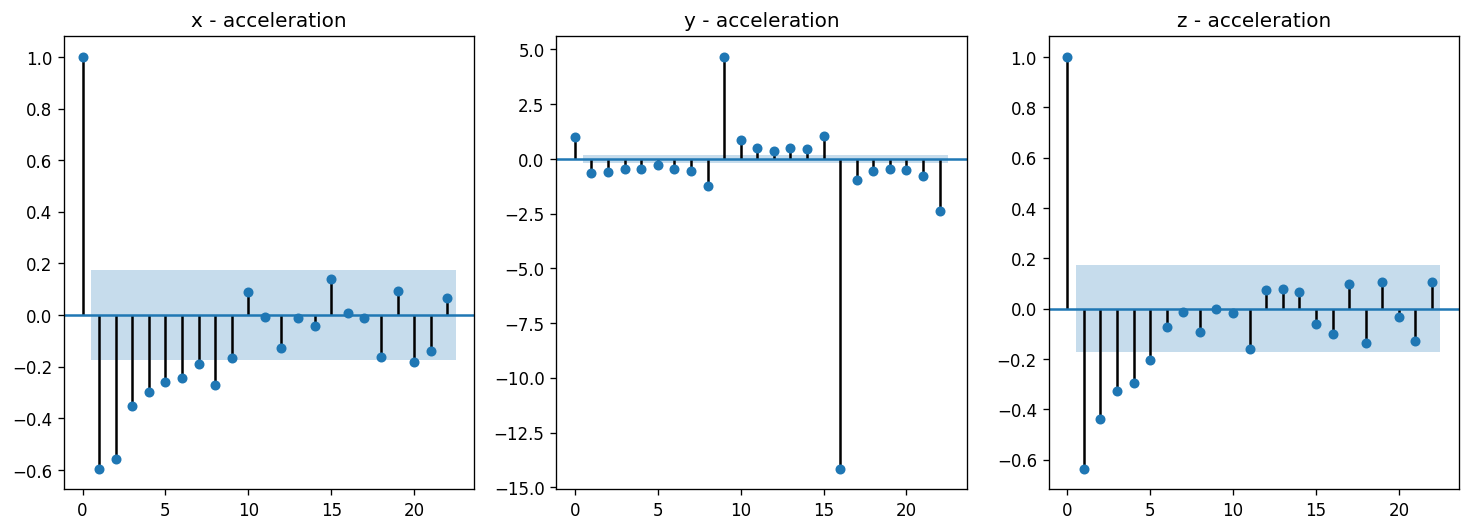

In [1664]:
#partial autocorrelation
fig, axes = plt.subplots(1, 3, sharex=True,figsize=(15,5))
plot_pacf(coords.iloc[:,0], ax=axes[0])
plot_pacf(coords.iloc[:,1], ax=axes[1])
plot_pacf(coords.iloc[:,2], ax=axes[2])
axes[0].set_title("x - position")
axes[1].set_title("y - position")
axes[2].set_title("z - position")

fig, axes = plt.subplots(1, 3, sharex=True,figsize=(15,5))
plot_pacf(vel.iloc[:,0].dropna(), ax=axes[0])
plot_pacf(vel.iloc[:,1].dropna(), ax=axes[1])
plot_pacf(vel.iloc[:,2].dropna(), ax=axes[2])

axes[0].set_title("x - velocity")
axes[1].set_title("y - velocity")
axes[2].set_title("z - velocity")

fig, axes = plt.subplots(1, 3, sharex=True,figsize=(15,5))
plot_pacf(acc.iloc[:,0].dropna(), ax=axes[0])
plot_pacf(acc.iloc[:,1].dropna(), ax=axes[1])
plot_pacf(acc.iloc[:,2].dropna(), ax=axes[2])

axes[0].set_title("x - acceleration")
axes[1].set_title("y - acceleration")
axes[2].set_title("z - acceleration")

plt.show()

In [1665]:
#TODO explain why auto arima selected the parameters based on acf/pacf

In [1666]:
import pmdarima as pm

args = {"start_p" : 1, "start_q" : 1,
          "test" : 'adf',       # use adftest to find optimal 'd'
          "max_p" : 3, "max_q" : 3, # maximum p and q
          "m" : 1,              # frequency of series
          "d":None,           # let model determine 'd'
          "seasonal" :False,   # No Seasonality
          "start_P":0, 
          "D":0, 
          "trace":True,
          "error_action":'ignore',  
          "suppress_warnings":True, 
          "stepwise":True}

x_model = pm.auto_arima(coords.iloc[:,0], **args)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1293.896, BIC=1305.304, Time=0.476 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1320.449, BIC=1326.153, Time=0.006 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1301.403, BIC=1309.959, Time=0.043 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1292.111, BIC=1300.667, Time=0.028 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1431.216, BIC=1434.068, Time=0.007 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1293.702, BIC=1305.110, Time=0.118 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1293.861, BIC=1308.121, Time=0.315 seconds
Total fit time: 1.040 seconds


In [1667]:
y_model = pm.auto_arima(coords.iloc[:,1], **args)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1290.520, BIC=1301.928, Time=0.152 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1331.283, BIC=1336.987, Time=0.006 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1301.632, BIC=1310.188, Time=0.024 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1290.834, BIC=1299.390, Time=0.086 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1426.603, BIC=1429.455, Time=0.007 seconds
Fit ARIMA: (2, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1287.342, BIC=1301.602, Time=0.112 seconds
Fit ARIMA: (2, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1285.753, BIC=1297.161, Time=0.059 seconds
Fit ARIMA: (3, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1287.222, BIC=1301.483, Time=0.090 seconds
Fit ARIMA: (3, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1289.222, BIC=1306.335, Time=0.113 seconds
Total fit time: 0.665 seconds


In [1668]:
z_model = pm.auto_arima(coords.iloc[:,2],**args)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1706.484, BIC=1717.892, Time=0.178 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1736.923, BIC=1742.628, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1716.140, BIC=1724.696, Time=0.076 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=1704.491, BIC=1713.047, Time=0.056 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1766.683, BIC=1769.535, Time=0.007 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1706.482, BIC=1717.891, Time=0.202 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=1707.589, BIC=1721.849, Time=0.294 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)
Total fit time: 0.830 seconds


In [1669]:
#given the best prediction quality (lowest AIC) we choose
#a first difference MA(1) model for the x coordinate
#a first difference AR(2) model for the y coordinate
#a first difference MA(1) model for the z coordinate

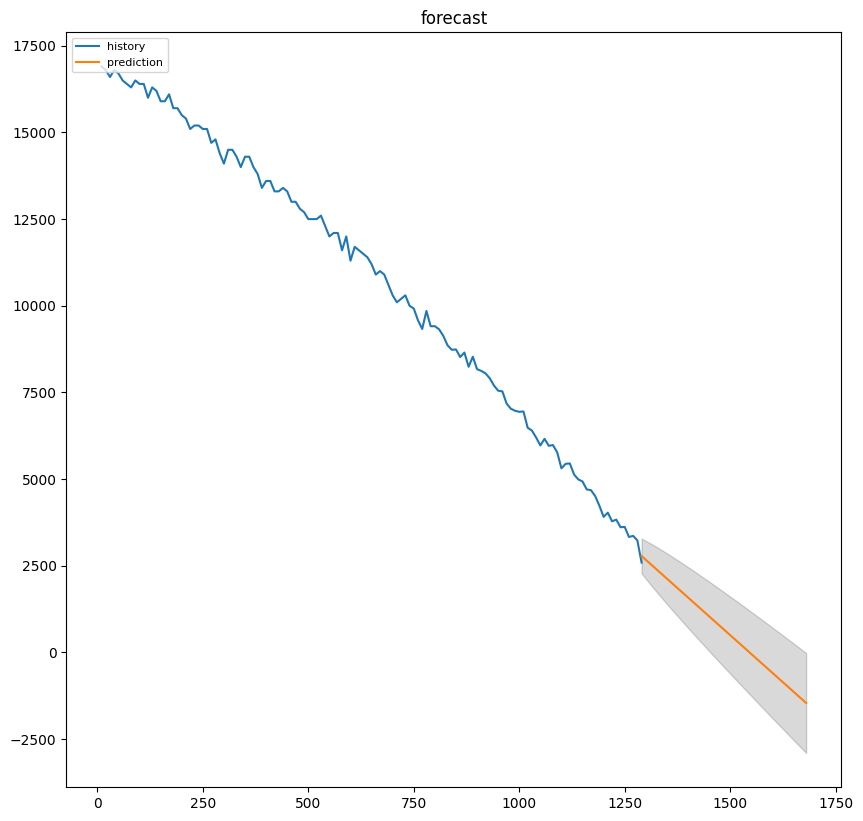

In [1670]:
#future prediction of z for the n time steps to identify time of collision
n = 40

future_fc_z,conf = z_model.predict(n,return_conf_int=True,alpha=0.005)
future_index = (pd.RangeIndex.from_range(range(len(coords)*10,(len(coords)+n)*10,10)))
future_fc_series_z = pd.Series(future_fc_z, index= future_index)
lower_conf_series_z = pd.Series(conf[:, 0], index= future_index)
upper_conf_series_z = pd.Series(conf[:, 1], index= future_index)

#plot 
plt.figure(figsize=(10,10), dpi=100)
plt.plot(coords.iloc[:,2], label='history')
plt.plot(future_fc_series_z, label='prediction')
plt.fill_between(lower_conf_series_z.index, lower_conf_series_z, upper_conf_series_z, 
                 color='k', alpha=.15)
plt.title('forecast')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [1671]:
future_fc_series_z.loc[1500:1600]
#we can see that the the expected impact occurs between the 1540 and the 1550 time step

1500    496.932977
1510    388.245358
1520    279.557738
1530    170.870119
1540     62.182500
1550    -46.505119
1560   -155.192738
1570   -263.880358
1580   -372.567977
1590   -481.255596
1600   -589.943215
dtype: float64

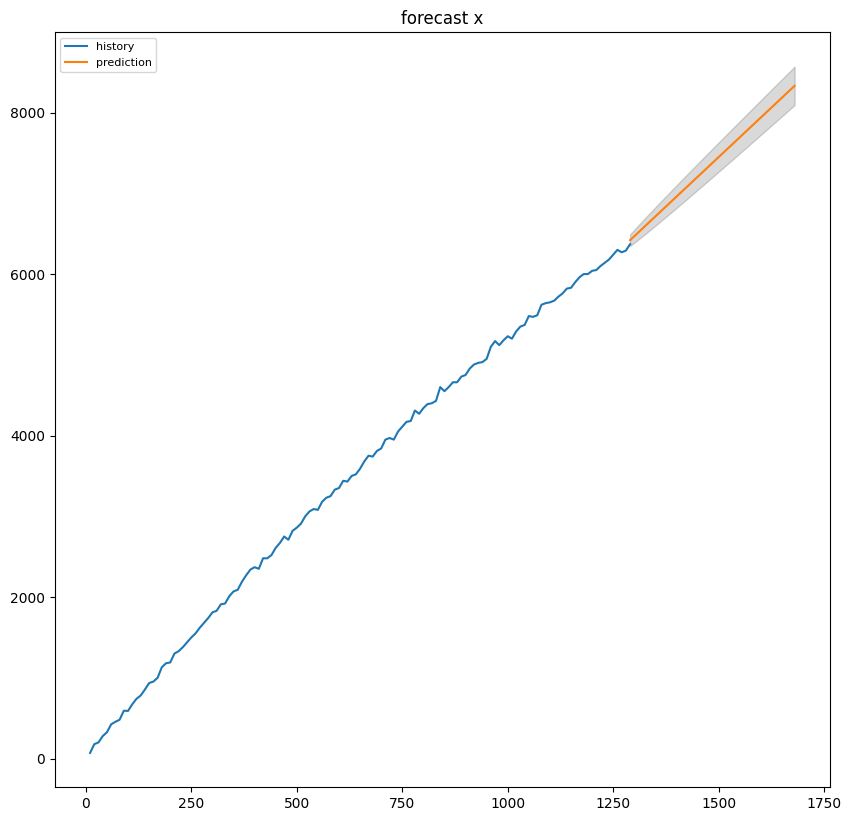

In [1672]:
#future prediction of x for the n time steps to identify position of collision
n = 40

future_fc_x,conf = x_model.predict(n,return_conf_int=True)
future_fc_series_x = pd.Series(future_fc_x, index= future_index)
lower_conf_series_x = pd.Series(conf[:, 0], index= future_index)
upper_conf_series_x = pd.Series(conf[:, 1], index= future_index)
#plot 
plt.figure(figsize=(10,10), dpi=100)
plt.plot(coords.iloc[:,0], label='history')
plt.plot(future_fc_series_x, label='prediction')
plt.fill_between(lower_conf_series_x.index, lower_conf_series_x, upper_conf_series_x, 
                 color='k', alpha=.15)
plt.title('forecast x')
plt.legend(loc='upper left', fontsize=8)
plt.show()

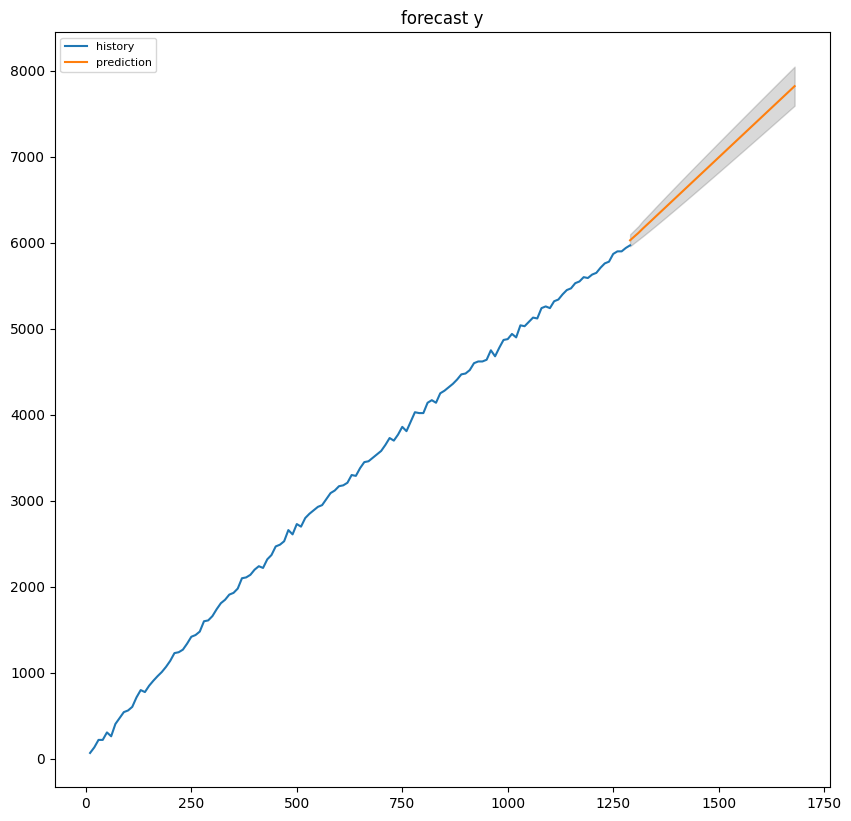

In [1673]:
#future prediction of y for the n time steps to identify position of collision
n = 40

future_fc_y,conf = y_model.predict(n,return_conf_int=True)
future_index = (pd.RangeIndex.from_range(range(len(coords)*10,(len(coords)+n)*10,10)))
future_fc_series_y = pd.Series(future_fc_y, index= future_index)
lower_conf_series_y = pd.Series(conf[:, 0], index= future_index)
upper_conf_series_y = pd.Series(conf[:, 1], index= future_index)

#plot 
plt.figure(figsize=(10,10), dpi=100)
plt.plot(coords.iloc[:,1], label='history')
plt.plot(future_fc_series_y, label='prediction')
plt.fill_between(lower_conf_series_y.index, lower_conf_series_y, upper_conf_series_y, 
                 color='k', alpha=.15)
plt.title('forecast y')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [1674]:
#Before we select this model, let's see how well this performs using out of time cross-validation
size = coords.shape[0]
train = coords.head(size-30)
test = coords.tail(30)

In [1675]:
x_model = pm.auto_arima(train.iloc[:,0],**args)
y_model = pm.auto_arima(train.iloc[:,1],**args)
z_model = pm.auto_arima(train.iloc[:,2],**args)

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=986.651, BIC=996.991, Time=0.123 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=1016.997, BIC=1022.167, Time=0.007 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=998.251, BIC=1006.006, Time=0.037 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=985.072, BIC=992.827, Time=0.030 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=1105.029, BIC=1107.613, Time=0.007 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=986.317, BIC=996.657, Time=0.115 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=985.501, BIC=998.426, Time=0.534 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 0.862 seconds
Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True

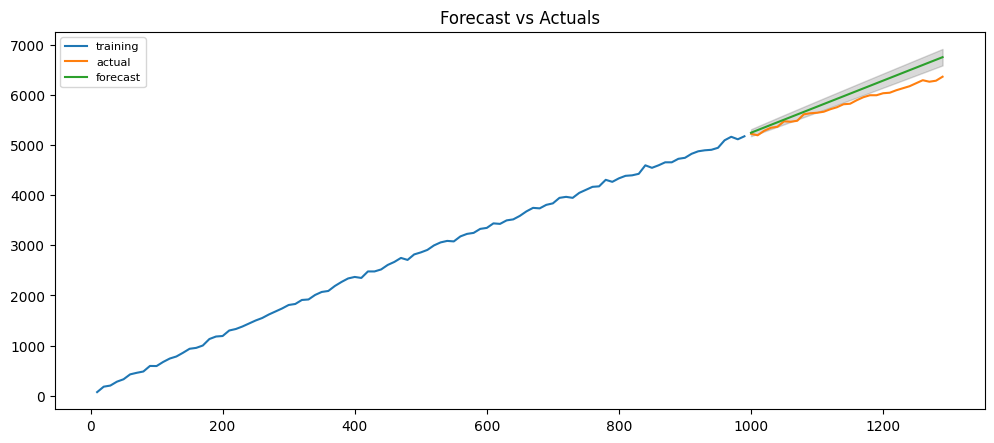

Mean absolute error 191.52 Mean squared error 49245.16 Mean absolute percentage error 3.42


In [1676]:
future_fc_x,conf = x_model.predict(test.shape[0],return_conf_int=True)
future_fc_series_x = pd.Series(future_fc_x, index= test.index)
lower_conf_series_x = pd.Series(conf[:, 0], index= test.index)
upper_conf_series_x = pd.Series(conf[:, 1], index= test.index)

#plot 
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.iloc[:,0], label='training')
plt.plot(test.iloc[:,0], label='actual')
plt.plot(future_fc_series_x, label='forecast')
plt.fill_between(lower_conf_series_x.index, lower_conf_series_x, upper_conf_series_x, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# MSE and the MAE of our model
mae = np.mean(np.abs(future_fc_x-test.iloc[:,0].values))
mse = np.mean(np.square(future_fc_x-test.iloc[:,0].values))
mape = 100 * np.mean(np.abs((test.iloc[:,0].values-future_fc_x)/test.iloc[:,1].values))

print('Mean absolute error %0.2f' % mae,'Mean squared error %0.2f' % mse, 'Mean absolute percentage error %0.2f' % mape)

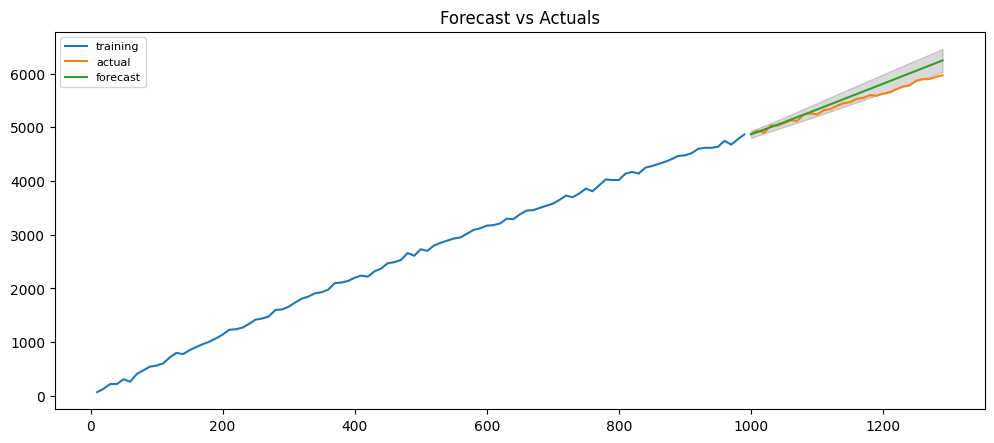

Mean absolute error 115.93 Mean squared error 20492.30 Mean absolute percentage error 2.05


In [1677]:
future_fc_y,conf = y_model.predict(test.shape[0],return_conf_int=True)
future_fc_series_y = pd.Series(future_fc_y, index= test.index)
lower_conf_series_y = pd.Series(conf[:, 0], index= test.index)
upper_conf_series_y = pd.Series(conf[:, 1], index= test.index)

#plot 
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.iloc[:,1], label='training')
plt.plot(test.iloc[:,1], label='actual')
plt.plot(future_fc_series_y, label='forecast')
plt.fill_between(lower_conf_series_y.index, lower_conf_series_y, upper_conf_series_y, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# MSE, MSE and the MAPE of our model
mae = np.mean(np.abs(future_fc_y-test.iloc[:,1].values))
mse = np.mean(np.square(future_fc_y-test.iloc[:,1].values))
mape = 100 * np.mean(np.abs((test.iloc[:,1].values-future_fc_y)/test.iloc[:,1].values))

print('Mean absolute error %0.2f' % mae,'Mean squared error %0.2f' % mse, 'Mean absolute percentage error %0.2f' % mape)

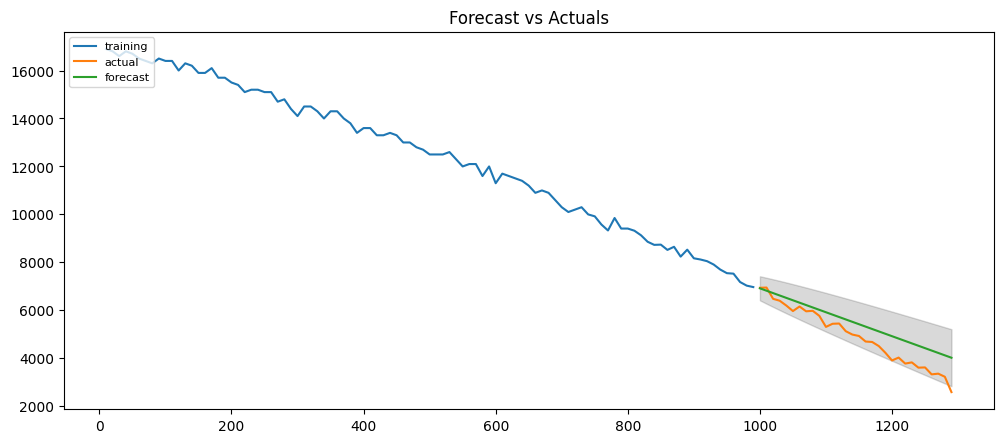

Mean absolute error 565.76 Mean squared error 429202.50 Mean absolute percentage error 14.12


In [1678]:
future_fc_z,conf = z_model.predict(test.shape[0],return_conf_int=True,alpha  = 0.005)
future_fc_series_z = pd.Series(future_fc_z, index= test.index)
lower_conf_series_z = pd.Series(conf[:, 0], index= test.index)
upper_conf_series_z = pd.Series(conf[:, 1], index= test.index)

#plot 
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.iloc[:,2], label='training')
plt.plot(test.iloc[:,2], label='actual')
plt.plot(future_fc_series_z, label='forecast')
plt.fill_between(lower_conf_series_z.index, lower_conf_series_z, upper_conf_series_z, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# MSE and the MAE of our model
mae = np.mean(np.abs(future_fc_z-test.iloc[:,2].values))
mse = np.mean(np.square(future_fc_z-test.iloc[:,2].values))
mape = 100 * np.mean(np.abs((test.iloc[:,2].values-future_fc_z)/test.iloc[:,2].values))

print('Mean absolute error %0.2f' % mae,'Mean squared error %0.2f' % mse, 'Mean absolute percentage error %0.2f' % mape)

In [1679]:
#the actual prediction was in each case outside the confidence interval
#and the MAPE for our z prediction is quite large

#We should be careful with the prediction of this model and increase the area that we would evacuate based on this CI

In [1680]:
#What if we can use cross-column information from to predict the variables

#correlation is quite small but existent
print(vel.corr())
print(acc.corr())

#that means that if we can say say there is a small relationship between change in velocity in x and y direction
#and z and y direction
#also x-z acceleration and z-y acceleration

#so there is a possibility that using information from other columns helps predicting 
print("----")
print(vel.iloc[:,0].autocorr(lag=2))
print(vel.iloc[:,1].autocorr(lag=2))
print(vel.iloc[:,2].autocorr(lag=2))
print("----")
print(acc.iloc[:,0].autocorr(lag=2))
print(acc.iloc[:,1].autocorr(lag=2))
print(acc.iloc[:,2].autocorr(lag=2))

#You can see on the auto correlation plots that the cross column correlation
#is comparable in size to the autocorrelation

          x         y         z
x  1.000000  0.120241  0.051882
y  0.120241  1.000000  0.165098
z  0.051882  0.165098  1.000000
          x         y         z
x  1.000000  0.053568  0.118429
y  0.053568  1.000000  0.128522
z  0.118429  0.128522  1.000000
----
-0.1160286539318385
-0.05907447461647388
-0.025552907748522136
----
-0.0050223596283557465
0.06528770335566109
0.14294412796895953


In [1681]:
#To capture the linear interdependencies among our 3 time series we can use vector autoregression (VAR)
#I don't have experience from it, but based on what I learned from the course and the explanation of wiki
#I understand the concept of it and the differences to univariate models

from statsmodels.tsa.api import VAR
model = VAR(train)
#select lag order based on information criteria-based order selection https://www.statsmodels.org/stable/vector_ar.html
model.select_order(15)
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar

/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

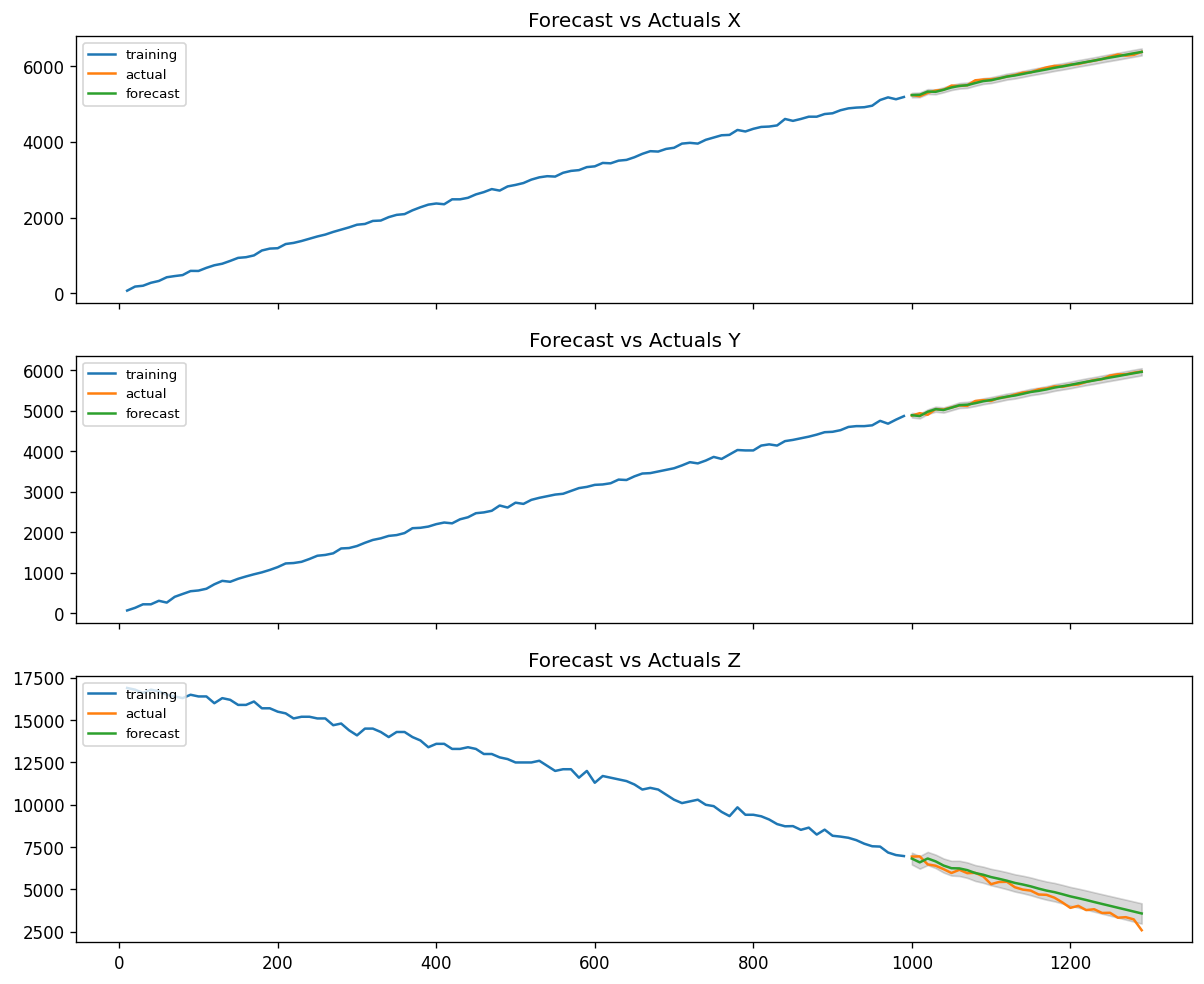

In [1682]:
fc, upper, lower = results.forecast_interval(train.values[-lag_order:],30,alpha=0.05) 

fc_series_x = pd.Series(fc[:,0], index = test.index) 
upper_x = pd.Series(lower[:,0], index = test.index)
lower_x = pd.Series(upper[:,0], index = test.index)
fc_series_y = pd.Series(fc[:,1], index = test.index)
upper_y = pd.Series(lower[:,1], index = test.index)
lower_y = pd.Series(upper[:,1], index = test.index)
fc_series_z = pd.Series(fc[:,2], index = test.index)
upper_z = pd.Series(lower[:,2], index = test.index)
lower_z = pd.Series(upper[:,2], index = test.index)

#plot 
fig, axes = plt.subplots(3, 1, sharex=True,figsize=(12,10))
axes[0].plot(train.iloc[:,0], label='training')
axes[0].plot(test.iloc[:,0], label='actual')
axes[0].plot(fc_series_x, label='forecast')
axes[0].fill_between(lower_x.index, lower_x, upper_x, 
                 color='k', alpha=.15)
axes[0].set_title('Forecast vs Actuals X')
axes[0].legend(loc='upper left', fontsize=8)

#plot 
axes[1].plot(train.iloc[:,1], label='training')
axes[1].plot(test.iloc[:,1], label='actual')
axes[1].plot(fc_series_y, label='forecast')
axes[1].fill_between(lower_y.index, lower_y, upper_y, 
                 color='k', alpha=.15)
axes[1].set_title('Forecast vs Actuals Y')
axes[1].legend(loc='upper left', fontsize=8)

#plot 
axes[2].plot(train.iloc[:,2], label='training')
axes[2].plot(test.iloc[:,2], label='actual')
axes[2].plot(fc_series_z, label='forecast')
axes[2].fill_between(lower_z.index, lower_z, upper_z, 
                 color='k', alpha=.15)
axes[2].set_title('Forecast vs Actuals Z')
axes[2].legend(loc='upper left', fontsize=8)
plt.savefig("var-err.eps")
plt.show()



In [1683]:
#the results of the VAR look significantly more accurate

In [1684]:
#let's compare the error terms

mae = np.mean(np.abs(fc[:,0]-test.iloc[:,0].values))
mse = np.mean(np.square(fc[:,0]-test.iloc[:,0].values))
mape = 100 * np.mean(np.abs((test.iloc[:,0].values-fc[:,0])/test.iloc[:,0].values))

print('X Mean absolute error %0.2f' % mae,'Mean squared error %0.2f' % mse, 'Mean absolute percentage error %0.2f' % mape)

mae = np.mean(np.abs(fc[:,1]-test.iloc[:,1].values))
mse = np.mean(np.square(fc[:,1]-test.iloc[:,1].values))
mape = 100 * np.mean(np.abs((test.iloc[:,1].values-fc[:,1])/test.iloc[:,1].values))


print('Y Mean absolute error %0.2f' % mae,'Mean squared error %0.2f' % mse, 'Mean absolute percentage error %0.2f' % mape)

mae = np.mean(np.abs(fc[:,2]-test.iloc[:,2].values))
mse = np.mean(np.square(fc[:,2]-test.iloc[:,2].values))
mape = 100 * np.mean(np.abs((test.iloc[:,2].values-fc[:,2])/test.iloc[:,2].values))

print('Z Mean absolute error %0.2f' % mae,'Mean squared error %0.2f' % mse, 'Mean absolute percentage error %0.2f' % mape)

X Mean absolute error 22.11 Mean squared error 882.19 Mean absolute percentage error 0.38
Y Mean absolute error 23.05 Mean squared error 901.18 Mean absolute percentage error 0.43
Z Mean absolute error 347.24 Mean squared error 161824.36 Mean absolute percentage error 8.53


In [1685]:
#The Z MAPE is 2 times lower, and for X and Y it is 10 and 5 times lower
#The model looks quite accurate now 



/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The Post

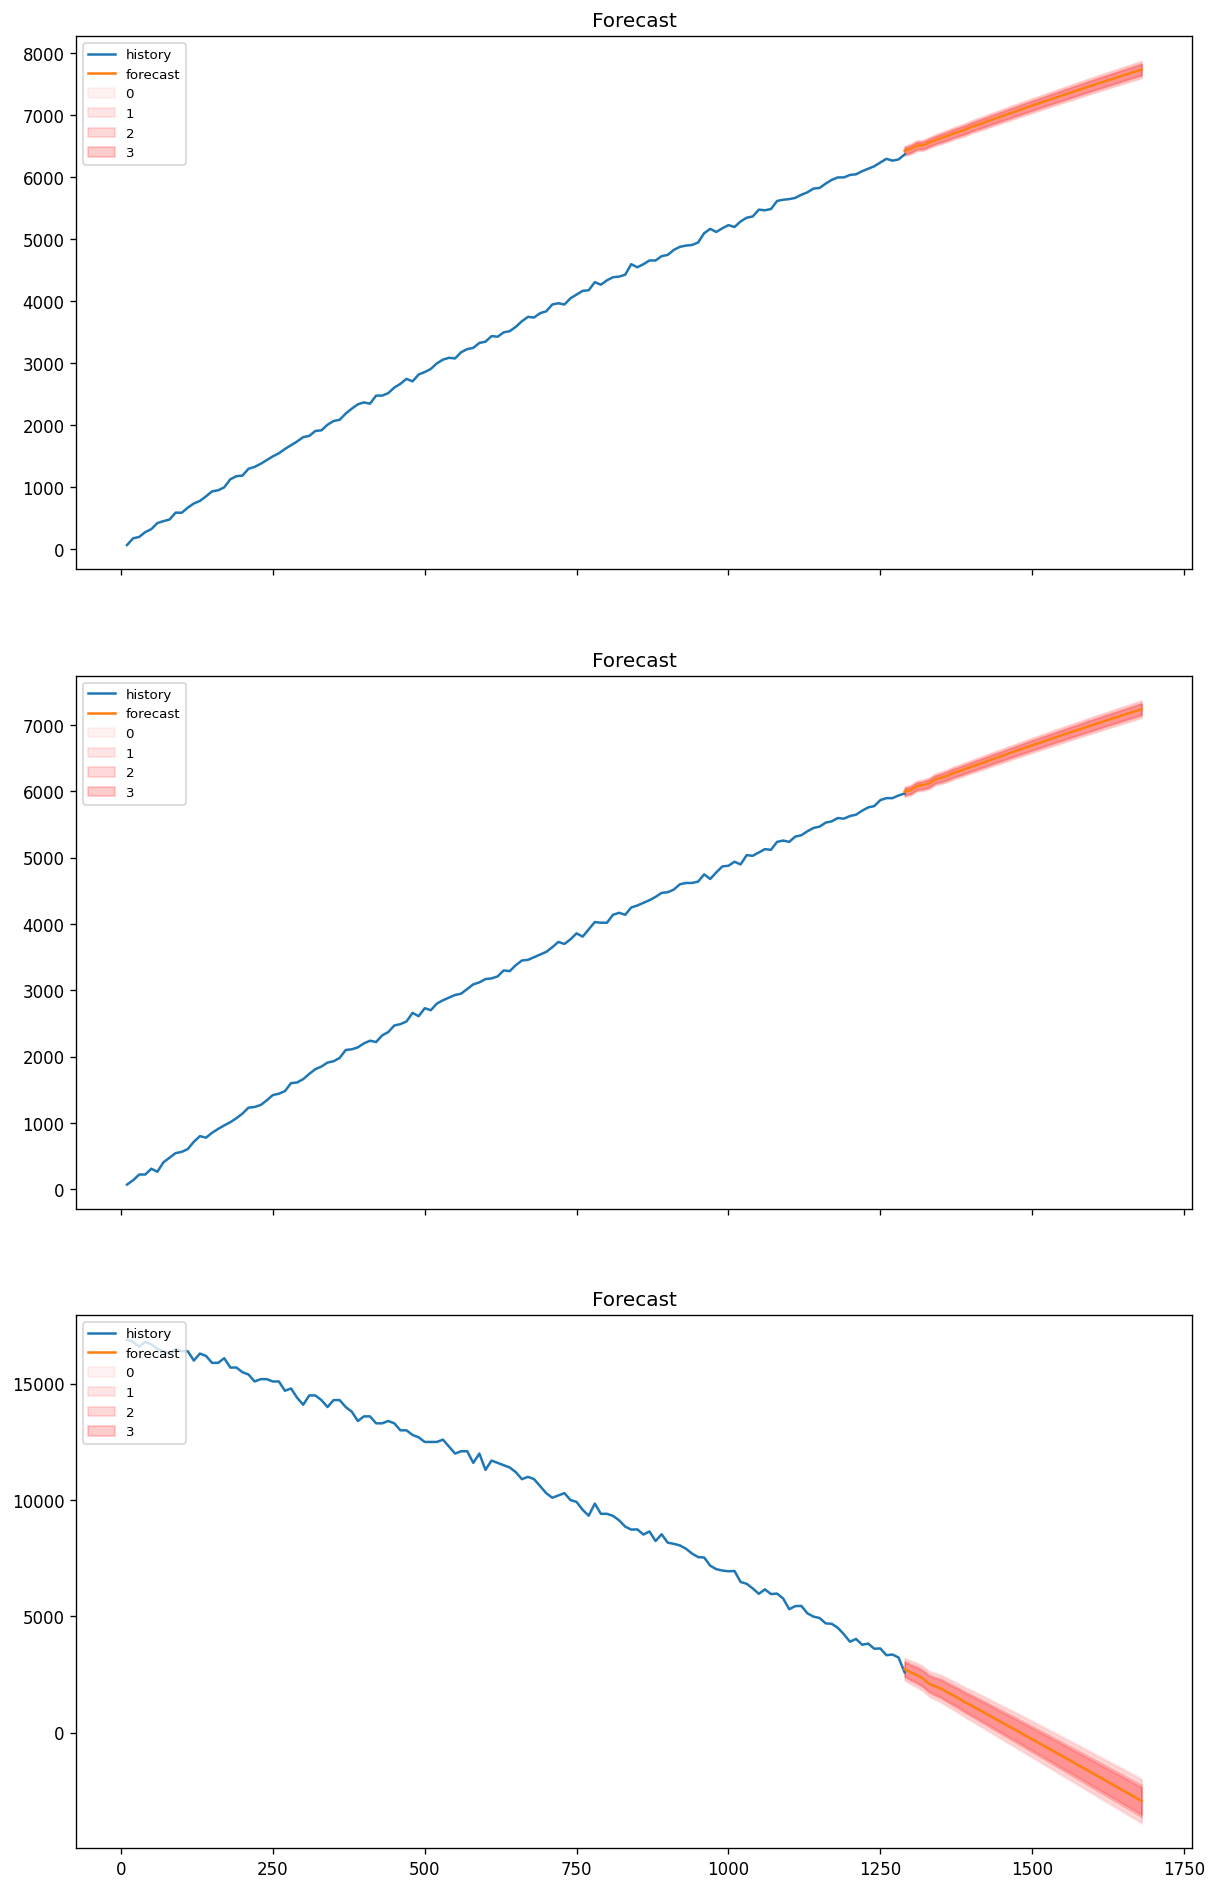

In [1686]:
#Let's use several alpha values to give a recommendation for evacuation to policy maker 
model = VAR(coords)
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar

n = 40
fc_ci = [results.forecast_interval(coords.values[-lag_order:],n,alpha=alpha) for alpha in [0.005,0.01,0.05,0.1]]
future_index = (pd.RangeIndex.from_range(range(len(coords)*10,(len(coords)+n)*10,10)))
fig, axes = plt.subplots(3, 1, sharex=True,figsize=(12,20))
for i in range(3): #x-y-z
    fc_i = fc_ci[0][0][:,i]

    axes[i].plot(coords.iloc[:,i], label='history')
    axes[i].plot(pd.Series(fc_i, index = future_index), label='forecast')
    
    for alpha in range(len([0.005,0.001,0.01,0.05])):
        up_i = fc_ci[alpha][1][:,i]
        low_i = fc_ci[alpha][2][:,i]    
        axes[i].fill_between(future_index, up_i, low_i, 
                         color='r', alpha=0.05*(alpha+1),label=alpha)
        
    axes[i].set_title('Forecast')
    axes[i].legend(loc='upper left', fontsize=8)
plt.savefig("var-fc.eps")

In [1687]:
#exp
pd.DataFrame(fc_ci[0][0][:,2],index=future_index).loc[1550:1600]

,0
1550,-1016.071857
1560,-1163.058948
1570,-1310.023343
1580,-1457.240332
1590,-1604.550023
1600,-1752.350693


In [1688]:
#lower
pd.DataFrame(fc_ci[0][1][:,2],index=future_index).loc[1480:1500]

,0
1480,-786.762711
1490,-944.553895
1500,-1100.478378


In [1689]:
#upper
pd.DataFrame(fc_ci[0][2][:,2],index=future_index).tail()

,0
1640,-1386.398735
1650,-1525.866629
1660,-1665.716661
1670,-1805.853260
1680,-1946.232578


In [1690]:
#interpolate the series with cubic spline to find root z = 0 and position of impact for expected collision
#and each confidence interval

from scipy.interpolate import interp1d
from scipy.optimize import root
f = interp1d(future_index,fc_ci[-1][0][:,2],kind='cubic')
r = root(f,1575).x[0]
print("Our expected time of impact in seconds is",r)

f = interp1d(future_index,fc_ci[-1][1][:,2],kind='cubic')
r_low = root(f,1480).x[0]
print("Our lower bound of the expected time of impact in seconds is",r_low)

f = interp1d(future_index,fc_ci[-1][2][:,2],kind='cubic')
r_up = root(f,1660).x[0]
print("Our upper bound of the expected time of impact in seconds is",r_up)

f = interp1d(future_index,fc_ci[-1][1][:,0],kind='cubic')
xpos = f(1480)
print(xpos)

f = interp1d(future_index,fc_ci[-1][1][:,1],kind='cubic')
ypos = f(1480)
print(ypos)


Our expected time of impact in seconds is 1480.4543055197337
Our lower bound of the expected time of impact in seconds is 1449.71861659208
Our upper bound of the expected time of impact in seconds is 1513.9133853968005
7018.457341320972
6564.248886554211


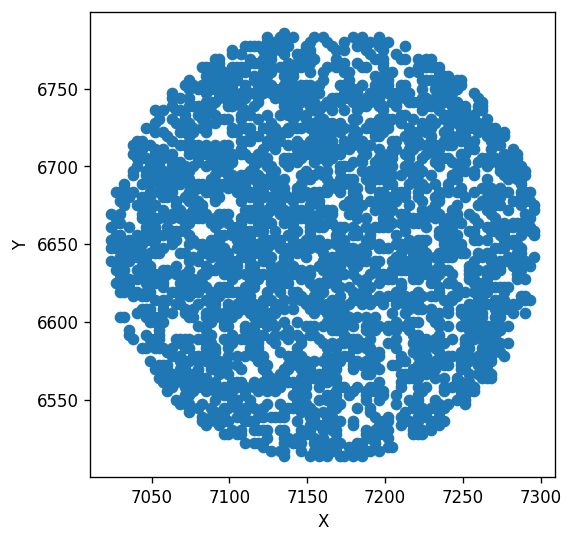

In [1691]:
#inspecting the buildings
buildings = pd.read_csv("mbuildings.csv")
fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
ax.scatter(buildings.x,buildings.y)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.savefig("buildings.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

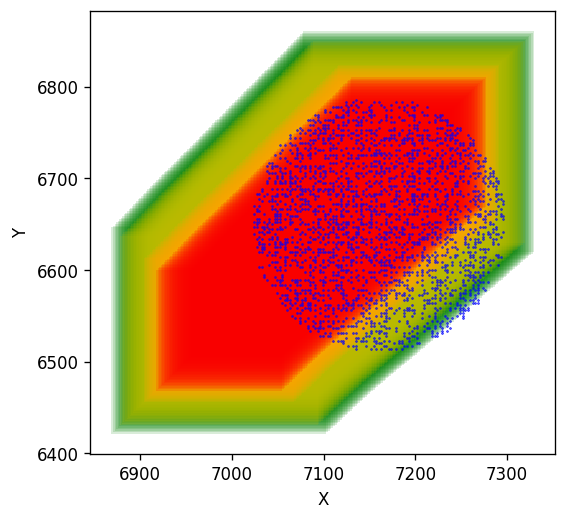

In [1692]:
#plot area of impact colored based on probablity of collision
import shapely.geometry as sg
import shapely.ops as so

x = interp1d(future_index,fc_ci[0][0][:,0],kind='cubic')
y = interp1d(future_index,fc_ci[0][0][:,1],kind='cubic')


fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
colors = ["r","orange","y","g"]
areas = []
for a in range(len([0.005,0.01,0.05,0.1])):
    x_low = interp1d(future_index,fc_ci[a][1][:,0],kind='cubic')
    x_up = interp1d(future_index,fc_ci[a][2][:,0],kind='cubic')

    y_low = interp1d(future_index,fc_ci[a][1][:,1],kind='cubic')
    y_up = interp1d(future_index,fc_ci[a][2][:,1],kind='cubic')
    polygons = sg.MultiPolygon()
    for t in np.arange(r_low,r_up,0.5):
        x1 = x_low(t)
        x2 = x_up(t)
        y1 = y_low(t)
        y2 = y_up(t)
        p1 = sg.Polygon([(x1,y1),(x1,y2),(x2,y2),(x2,y1)])
        polygons = so.unary_union([polygons,p1])
        xs,ys = p1.exterior.xy
        ax.fill(xs, ys, alpha=0.15, fc=colors[3-a],label=alpha,zorder=-1)
    areas.append(polygons)
ax.scatter(buildings.x,buildings.y,s=0.2,c="b",zorder=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.savefig("area.eps")
plt.show()

In [1693]:
#based on this area count people in houses that are affected

#for alpha = 0.05
area = areas[-2]
affected = np.zeros(len(areas))
for i,area in enumerate(areas):
    for building in buildings.values:
        loc = sg.Point(building[3],building[4])
        if loc.within(area) and not np.isnan(building[0]):
            affected[i] = affected[i] + building[0]
affected #affected people people based on selected confidence interval           

array([3597., 3531., 3213., 2908.])

In [1694]:
#run model again with more exact measurements
radar2 = pd.read_csv('radar2.csv')
radar2.columns = ["time","x","y","z"]
coords2 = radar2.set_index("time").iloc[:,0:]

/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The Post

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

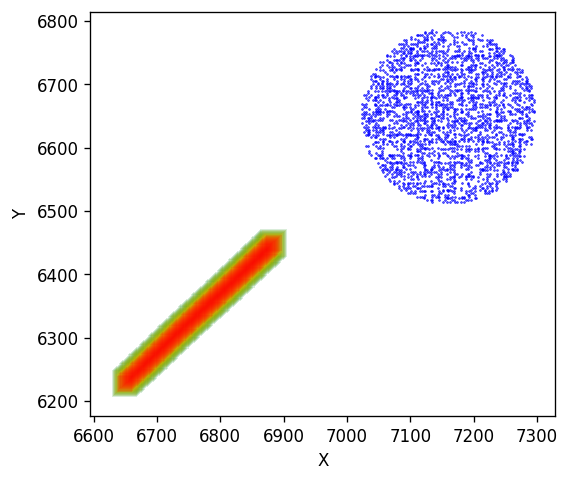

In [1695]:
model = VAR(coords2)
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar

n = 40
fc_ci = [results.forecast_interval(coords2.values[-lag_order:],n,alpha=alpha) for alpha in [0.005,0.01,0.05,0.1]]

x = interp1d(future_index,fc_ci[0][0][:,0],kind='cubic')
y = interp1d(future_index,fc_ci[0][0][:,1],kind='cubic')


fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
colors = ["r","orange","y","g"]
areas = []
for a in range(len([0.005,0.01,0.05,0.1])):
    x_low = interp1d(future_index,fc_ci[a][1][:,0],kind='cubic')
    x_up = interp1d(future_index,fc_ci[a][2][:,0],kind='cubic')

    y_low = interp1d(future_index,fc_ci[a][1][:,1],kind='cubic')
    y_up = interp1d(future_index,fc_ci[a][2][:,1],kind='cubic')
    polygons = sg.MultiPolygon()
    for t in np.arange(r_low,r_up,0.5):
        x1 = x_low(t)
        x2 = x_up(t)
        y1 = y_low(t)
        y2 = y_up(t)
        p1 = sg.Polygon([(x1,y1),(x1,y2),(x2,y2),(x2,y1)])
        polygons = so.unary_union([polygons,p1])
        xs,ys = p1.exterior.xy
        ax.fill(xs, ys, alpha=0.15, fc=colors[3-a],label=alpha,zorder=-1)
    areas.append(polygons)
ax.scatter(buildings.x,buildings.y,s=0.2,c="b",zorder=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.savefig("area-new.eps")
plt.show()

In [1696]:
#new observations
future_index = (pd.RangeIndex.from_range(range(len(coords2)*10,(len(coords2)+n)*10,10)))
f = interp1d(future_index,fc_ci[0][0][:,2],kind='cubic')
r = root(f,1400).x[0]
print("Our expected time of impact in seconds is",r)

f = interp1d(future_index,fc_ci[0][1][:,2],kind='cubic')
r_low = root(f,1400).x[0]
print("Our lower bound of the expected time of impact in seconds is",r_low)

f = interp1d(future_index,fc_ci[0][2][:,2],kind='cubic')
r_up = root(f,1400).x[0]
print("Our upper bound of the expected time of impact in seconds is",r_up)

Our expected time of impact in seconds is 1483.065982838531
Our lower bound of the expected time of impact in seconds is 1472.748693865756
Our upper bound of the expected time of impact in seconds is 1493.5727922592043


In [1697]:
#based on this area count people in houses that are affected

#for alpha = 0.05
area = areas[-2]
affected = np.zeros(len(areas))
for i,area in enumerate(areas):
    for building in buildings.values:
        loc = sg.Point(building[3],building[4])
        if loc.within(area) and not np.isnan(building[0]):
            affected[i] = affected[i] + building[0]
affected #affected people people based on selected confidence interval           

array([0., 0., 0., 0.])

In [1698]:
#The radar2 data has less observations and that's why it first deviates more from the prior forecast than expected
#I evaluate the radar1 data again with less observations to give a meaningful comparison
model = VAR(coords[:1190])
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar

n = 40
fc_ci = [results.forecast_interval(coords[:1190].values[-lag_order:],n,alpha=alpha) for alpha in [0.005,0.01,0.05,0.1]]

future_index = (pd.RangeIndex.from_range(range(len(coords[:1190])*10,(len(coords[:1190])+n)*10,10)))
#Let's use several alpha values to give a recommendation for evacuation to policy maker 
model = VAR(coords)
results = model.fit(maxlags=15, ic='aic')
lag_order = results.k_ar

/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/samuel/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [1699]:
#new observations
f = interp1d(future_index,fc_ci[0][0][:,2],kind='cubic')
r = root(f,1400).x[0]
print("Our expected time of impact in seconds is",r)

f = interp1d(future_index,fc_ci[0][1][:,2],kind='cubic')
r_low = root(f,1400).x[0]
print("Our lower bound of the expected time of impact in seconds is",r_low)

f = interp1d(future_index,fc_ci[0][2][:,2],kind='cubic')
r_up = root(f,1400).x[0]
print("Our upper bound of the expected time of impact in seconds is",r_up)

Our expected time of impact in seconds is 1506.128260534395
Our lower bound of the expected time of impact in seconds is 1443.126497749212
Our upper bound of the expected time of impact in seconds is 1577.0317328958995


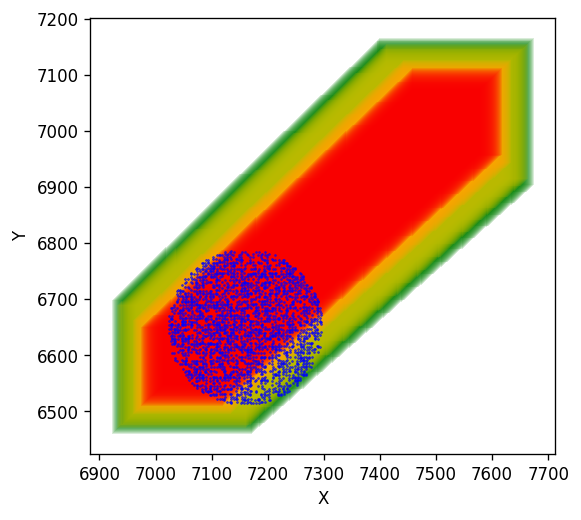

In [1700]:
#plot area of impact colored based on probablity of collision
import shapely.geometry as sg
import shapely.ops as so

x = interp1d(future_index,fc_ci[0][0][:,0],kind='cubic')
y = interp1d(future_index,fc_ci[0][0][:,1],kind='cubic')


fig, ax = plt.subplots()
plt.gca().set_aspect('equal', adjustable='box')
colors = ["r","orange","y","g"]
areas = []
for a in range(len([0.005,0.01,0.05,0.1])):
    x_low = interp1d(future_index,fc_ci[a][1][:,0],kind='cubic')
    x_up = interp1d(future_index,fc_ci[a][2][:,0],kind='cubic')

    y_low = interp1d(future_index,fc_ci[a][1][:,1],kind='cubic')
    y_up = interp1d(future_index,fc_ci[a][2][:,1],kind='cubic')
    polygons = sg.MultiPolygon()
    for t in np.arange(r_low,r_up,0.5):
        x1 = x_low(t)
        x2 = x_up(t)
        y1 = y_low(t)
        y2 = y_up(t)
        p1 = sg.Polygon([(x1,y1),(x1,y2),(x2,y2),(x2,y1)])
        polygons = so.unary_union([polygons,p1])
        xs,ys = p1.exterior.xy
        ax.fill(xs, ys, alpha=0.15, fc=colors[3-a],label=alpha,zorder=-1)
    areas.append(polygons)
ax.scatter(buildings.x,buildings.y,s=0.2,c="b",zorder=1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()


In [1701]:
#based on this area count people in houses that are affected

#for alpha = 0.05
area = areas[-2]
affected = np.zeros(len(areas))
for i,area in enumerate(areas):
    for building in buildings.values:
        loc = sg.Point(building[3],building[4])
        if loc.within(area) and not np.isnan(building[0]):
            affected[i] = affected[i] + building[0]
affected #affected people people based on selected confidence interval           

array([3603., 3599., 3351., 3145.])

In [1702]:
#the difference comes from the variance of the noise (5 times smaller)